In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e4/sample_submission.csv
/kaggle/input/playground-series-s3e4/train.csv
/kaggle/input/playground-series-s3e4/test.csv


importing the necessary data

In [2]:
train_data=pd.read_csv('/kaggle/input/playground-series-s3e4/train.csv')
test_data=pd.read_csv('/kaggle/input/playground-series-s3e4/test.csv')

In [3]:
X_train=train_data.drop('Class',axis=1)
y_train=train_data['Class']
X_train.head()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,...,-0.292969,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98
1,1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,...,0.065717,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00
2,2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,...,-0.021375,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69
3,3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,...,-0.340089,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00
4,4,0.0,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,...,-0.203628,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00


In [4]:
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

dropping id for the training

In [5]:
X_train1=X_train.copy()
X_train=X_train.drop('id',axis=1)
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,0.742144,...,-0.292969,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98
1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,-0.109948,...,0.065717,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00
2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,-0.042027,...,-0.021375,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69
3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,0.885838,...,-0.340089,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00
4,0.0,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,0.692665,...,-0.203628,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00


using mutual information to find the information gain needed

In [6]:
discrete_features=list(X_train.columns)
print(discrete_features)

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


using mutual info classif to find the best features for training the target features

In [7]:
from sklearn.feature_selection import mutual_info_classif

def make_mi_scores(X_train,y_train):
    mi_scores = mutual_info_classif(X_train,y_train)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X_train.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X_train,y_train)
mi_scores

V14       0.001187
V17       0.001129
V2        0.000989
V3        0.000956
V10       0.000798
V21       0.000786
Amount    0.000786
V7        0.000718
V8        0.000680
V11       0.000675
V1        0.000592
V4        0.000551
V5        0.000536
V18       0.000518
V12       0.000495
V6        0.000477
V16       0.000475
V20       0.000430
V23       0.000403
V27       0.000389
V28       0.000382
V9        0.000254
V22       0.000235
Time      0.000145
V26       0.000084
V25       0.000076
V24       0.000066
V13       0.000060
V15       0.000047
V19       0.000030
Name: MI Scores, dtype: float64

lets try to plot all the mutual information scores and obtain a specific threshold 

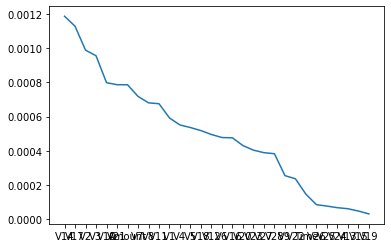

In [8]:
import matplotlib.pyplot as plt
plt.plot(mi_scores.index,mi_scores)

lets select all features above the threshold of 0.001

In [9]:
threshold=0.0006
feature=mi_scores
# Find the indexes of the rows where the feature is greater than the threshold
indexes = feature[feature > threshold].index

In [10]:
print(indexes)

Index(['V14', 'V17', 'V2', 'V3', 'V10', 'V21', 'Amount', 'V7', 'V8', 'V11'], dtype='object')


finding the final training dataset"

In [11]:
X_train_final=X_train[discrete_features]
X_train_final.head()
X_test_final=test_data[discrete_features]

scaling training and test data

In [12]:
from sklearn.preprocessing import StandardScaler

# create the scaler
scaler = StandardScaler()

# fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train_final)

# convert the scaled data back to a pandas DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_final.columns)

# transform the test data
X_test_scaled = scaler.transform(X_test_final)

# convert the scaled data back to a pandas DataFrame
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_final.columns)

viewing the scaled datasets

In [13]:
X_train_scaled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-2.434688,1.417723,-0.153277,-1.526656,0.274174,-0.029063,-1.117617,0.292364,-0.576662,0.749882,...,-0.688652,-0.718199,-1.400090,1.217046,-0.181829,-1.021451,0.417528,-0.388293,-0.466403,-0.426937
1,-2.434688,1.363615,-1.120222,-0.982513,-0.769129,-0.898502,-0.336453,-1.102617,-0.138696,-0.058446,...,0.127433,0.203208,0.020885,0.578455,-0.773794,-1.449321,-1.001415,-0.100477,-0.336961,0.116982
2,-2.434688,-0.003205,0.824427,-0.719888,-0.402612,0.775205,-0.933160,1.317136,-0.327171,0.005986,...,-0.070720,-0.699333,-1.259402,0.644384,1.608883,-1.551175,0.158620,0.901735,0.424868,-0.422228
3,-2.434688,1.349872,-0.201150,-1.462031,0.040580,-0.050193,-0.650792,0.049435,-0.258165,0.886196,...,-0.795861,-0.152446,-0.048410,0.685889,-0.067352,-0.302912,-0.223754,-0.307748,-0.552913,-0.433436
4,-2.434688,0.666386,-0.189836,0.539876,0.937360,-0.444137,0.802877,-0.991706,0.586008,0.702944,...,-0.485382,0.308014,1.103629,0.246506,-0.438073,0.329029,-0.554398,0.404124,0.022671,-0.433436


In [14]:
X_test_scaled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,2.271738,1.447241,-0.638173,-1.675036,-0.602438,-0.448525,-0.747227,-0.974097,-0.240939,-0.172452,...,0.131187,0.645192,1.226771,0.277521,-0.916993,-0.607417,-0.199994,-0.039913,-0.238127,-0.241453
1,2.271738,1.180659,-1.491439,-1.005833,-0.902056,-0.499539,1.933733,-1.841196,1.290116,1.059176,...,0.983074,1.358501,2.250585,1.131681,6.250089,-0.901276,0.124142,-0.048875,0.287380,0.644189
2,2.271738,1.511772,-1.396609,-0.733587,-1.381980,-1.393858,-0.156677,-1.901407,-0.061323,-1.071508,...,-0.856873,-0.237628,0.229965,1.074589,1.251192,-1.639897,-0.649327,0.127123,-0.334642,-0.333963
3,2.271738,1.357095,-0.880542,-2.233562,-1.204513,-0.004956,-0.771565,0.466362,-0.766985,2.018455,...,-0.133882,-0.116021,0.067113,0.037655,1.112501,0.539572,-1.345129,-0.164435,-0.324256,0.362216
4,2.271738,-1.461605,-1.480516,-0.201699,-0.835420,2.661300,-1.805850,0.205497,-0.277054,-0.221424,...,0.868946,0.270717,-0.428340,0.937704,-0.655552,-2.248910,-0.075101,1.357266,1.930292,-0.426937


importing catboost

In [15]:
from catboost import CatBoostClassifier


defining a classifier model

In [16]:
model_cbc=CatBoostClassifier(iterations=100,random_state=42,eval_metric='AUC')

In [17]:
model_cbc.fit(X_train_scaled,y_train)

Learning rate set to 0.5
0:	total: 114ms	remaining: 11.3s
1:	total: 164ms	remaining: 8.06s
2:	total: 205ms	remaining: 6.63s
3:	total: 238ms	remaining: 5.72s
4:	total: 276ms	remaining: 5.24s
5:	total: 313ms	remaining: 4.91s
6:	total: 348ms	remaining: 4.62s
7:	total: 380ms	remaining: 4.37s
8:	total: 420ms	remaining: 4.25s
9:	total: 455ms	remaining: 4.09s
10:	total: 490ms	remaining: 3.96s
11:	total: 524ms	remaining: 3.84s
12:	total: 560ms	remaining: 3.74s
13:	total: 599ms	remaining: 3.68s
14:	total: 636ms	remaining: 3.6s
15:	total: 671ms	remaining: 3.52s
16:	total: 706ms	remaining: 3.44s
17:	total: 741ms	remaining: 3.38s
18:	total: 784ms	remaining: 3.34s
19:	total: 816ms	remaining: 3.26s
20:	total: 854ms	remaining: 3.21s
21:	total: 891ms	remaining: 3.16s
22:	total: 926ms	remaining: 3.1s
23:	total: 965ms	remaining: 3.05s
24:	total: 1s	remaining: 3s
25:	total: 1.03s	remaining: 2.94s
26:	total: 1.07s	remaining: 2.9s
27:	total: 1.11s	remaining: 2.87s
28:	total: 1.15s	remaining: 2.83s
29:	tota

predicting values using the fitted model

In [18]:
pred=model_cbc.predict(X_test_scaled)

In [19]:
output=pd.DataFrame({'id':test_data['id'],'Class':pred})
output.to_csv('submission.csv')
print('Submission successful')

Submission successful


In [20]:
output.head()

,id,Class
0,219129,0
1,219130,0
2,219131,0
3,219132,0
4,219133,0


**first submission.**